In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nelpy as nel
from scipy.io import savemat

/home/kemerelab/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [3]:
d = np.load('/home/kemerelab/Downloads/mazesEEG/RatS-Day5TwoNovel-2020-12-04_07-55-09.paradigm.npy',allow_pickle=True)
period_names = d.item(0)['epochs']['label'].values
period = np.vstack((d.item(0)['epochs']['start'].values,d.item(0)['epochs']['stop'].values))
period_bounds = nel.EpochArray(period.T)
period_names, period_bounds.data

(array(['pre', 'maze1', 'post1', 'maze2', 'post2'], dtype=object),
 array([[    0, 11066],
        [11070, 13970],
        [13972, 20754],
        [20756, 24004],
        [24006, 42305]]))

In [4]:
# Define maze ID
maze_id = 1
period_names[maze_id]

'maze1'

## change time bin size

In [21]:
def get_curves(st,TB):
    TSL = [] # total spikes per time bin list according to time bin size
    TANL = [] # total number of active neurons list according to time bin size
    meanspk_active = [] # mean number of spikes in active time bin
    spikes95pct = [] # 95 percentile of #spikes/bin in active time bin in each cell
    n = st.data.shape
    for tbin in TB:
        spikes = st.bin(ds=tbin)
        neuron_list = np.zeros(n)
        for i,t in enumerate(spikes.data):
            if t.sum()>0:
                neuron_list[i] = np.percentile(t[t!=0],95)
            else:
                neuron_list[i] = 0
        spikes95pct.append(neuron_list)
        totalspk = np.mean(spikes.data.sum(axis=0))
        totalactive = np.mean((spikes.data>0).sum(axis=0))
        
        TSL.append(totalspk)
        TANL.append(totalactive)
        meanspk_active.append(np.mean(spikes.data[spikes.data>0]))
        
    TSL = np.array(TSL)
    TANL = np.array(TANL)
    meanspk_active = np.array(meanspk_active)
    spikes95pct = np.array(spikes95pct)
    return TSL,TANL,meanspk_active,spikes95pct

In [26]:
def get_num_of_active_place_cells(st,TB,place_cell):
    TAPCL = [] # total number of active place cells list according to time bin size
    for tbin in TB:
        spikes = st.bin(ds=tbin)
        totalactive = np.mean((spikes.data[place_cell,:]>0).sum(axis=0))
        TAPCL.append(totalactive)
        
    TAPCL = np.array(TAPCL)
    return TAPCL

In [7]:
pbe = nel.load_pkl('pbe_maze1.nel')

In [8]:
pbe.support

<EpochArray at 0x7f63176468b0: 562 epochs> of length 2:04:680 minutes

## run

In [54]:
run_epoch = nel.load_pkl('maze1_runepoch_3_5.nel')

In [55]:
period_bounds[maze_id] , run_epoch

(<EpochArray at 0x7ff8452c9ac0: 1 epoch> of length 54:08 minutes,
 <EpochArray at 0x7ff8452c9d60: 154 epochs> of length 7:30:350 minutes)

In [56]:
d = np.load('RatS-Day5TwoNovel-2020-12-04_07-55-09_spikes.npy',allow_pickle=True)

In [11]:
# period_bounds[maze_id]-pbe.support

<EpochArray at 0x7f631768c6a0: 563 epochs> of length 46:15:320 minutes

In [57]:
# st = nel.SpikeTrainArray(timestamps=d.item(0)['times'],support=period_bounds[maze_id]-pbe.support) # all behavior excluding PBE
st = nel.SpikeTrainArray(timestamps=d.item(0)['times'],support=run_epoch) # running epochs

/home/kemerelab/nelpy/nelpy/core/_eventarray.py:443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/kemerelab/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/kemerelab/nelpy/nelpy/core/_eventarray.py:504: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [69]:
name = period_names[maze_id]+'_run_v1_'+str(v1)+'_v2_'+str(v2)+'_500ms_new.mat'
name

'maze1_run_v1_3_v2_5_500ms_new.mat'

In [70]:
savemat(name,dic)

In [7]:
place_cell = np.load('CCH_alldircell_130toendrun_maze1.npz')['place_cell']
place_cell

array([  1,   2,   3,   5,   6,   8,  10,  11,  13,  14,  16,  18,  19,
        21,  22,  25,  27,  28,  29,  30,  33,  34,  39,  41,  42,  44,
        47,  48,  49,  53,  54,  55,  56,  57,  58,  59,  63,  64,  65,
        66,  68,  69,  73,  74,  75,  76,  77,  80,  82,  86,  87,  89,
        91,  92,  93,  94,  95,  97,  99, 101, 103, 104, 105, 107, 108])

In [242]:
# selectper = nel.EpochArray([11814,period_bounds[maze_id].data[0,1]])

In [243]:
# st = st[selectper]
# st

<SpikeTrainArray at 0x7f9b4f4dddf0: 109 units> at 30000 Hz

In [27]:
st.support

<EpochArray at 0x7f63176e9a60: 563 epochs> of length 46:15:320 minutes

In [28]:
TB = np.arange(.02,1.01,0.02)
TB

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [157]:
# get curves for run
TSL,TANL,meanspk_active,spikes95pct = get_curves(st,TB)
TSL.shape,TANL.shape,meanspk_active.shape,spikes95pct.shape

((50,), (50,), (50,), (50, 109))

In [36]:
TAPCL = get_num_of_active_place_cells(st,TB,place_cell)

In [35]:
TAPCL_behav = TAPCL.copy()

In [31]:
np.savez('curve4bin_maze1behav',TB=TB,TAPCL=TAPCL,TSL=TSL_behav,TANL=TANL_behav,meanspk_active=meanspk_active_behav,spikes95pct=spikes95pct_behav)

In [38]:
np.savez('curve4bin_maze1run_3_5',TB=TB,TAPCL=TAPCL,TSL=TSL,TANL=TANL,meanspk_active=meanspk_active,spikes95pct=spikes95pct)

In [163]:
del st,d

In [8]:
name = 'curve4bin_maze1behav.npz'
# TSL_behav = np.load(name)['TSL']
# TANL_behav = np.load(name)['TANL']
# meanspk_active_behav = np.load(name)['meanspk_active']
spikes95pct_behav = np.load(name)['spikes95pct']

In [12]:
name = 'curve4bin_maze1run_3_5.npz'
TB = np.load(name)['TB']
# TSL = np.load(name)['TSL']
# TANL = np.load(name)['TANL']
# meanspk_active = np.load(name)['meanspk_active']
spikes95pct = np.load(name)['spikes95pct']

## PBEs

In [4]:
pbe = nel.load_pkl('pbe_maze1.nel')

Text(0.5, 1.0, 'lengths of PBE')

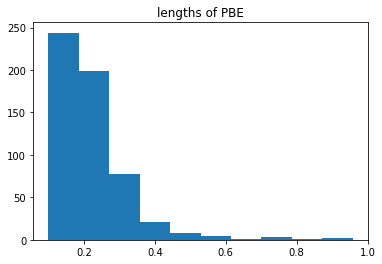

In [23]:
plt.hist(pbe.support.data[:,1]-pbe.support.data[:,0])
plt.title('lengths of PBE')

In [24]:
# FR = spikes.data.mean(axis=1)/tbin
# plt.plot(FR)
# plt.show()

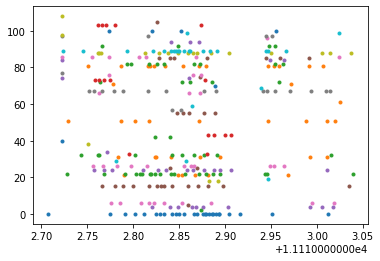

In [182]:
for i,t in enumerate(pbe[4].data):
    plt.plot(t,np.ones_like(t)*i,'.')

In [39]:
TB_pbe = np.arange(0.003,0.025,0.001)
TB_pbe

array([0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011,
       0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02 ,
       0.021, 0.022, 0.023, 0.024])

In [25]:
# get curves for pbe
TSL_pbe,TANL_pbe,meanspk_active_pbe,spikes95pct_pbe = get_curves(pbe,TB_pbe)
TSL_pbe.shape,TANL_pbe.shape,meanspk_active_pbe.shape,spikes95pct_pbe.shape

((22,), (22,), (22,), (22, 109))

In [40]:
TAPCL_pbe = get_num_of_active_place_cells(pbe,TB_pbe,place_cell)

In [42]:
np.savez('curve4bin_maze1pbe',TB_pbe=TB_pbe,TAPCL_pbe=TAPCL_pbe,TSL_pbe=TSL_pbe,TANL_pbe=TANL_pbe,meanspk_active_pbe=meanspk_active_pbe,spikes95pct_pbe=spikes95pct_pbe)

In [10]:
TB_pbe = np.load('curve4bin_maze1pbe.npz')['TB_pbe']
# TSL_pbe = np.load('curve4bin_maze1pbe.npz')['TSL_pbe']
# TANL_pbe = np.load('curve4bin_maze1pbe.npz')['TANL_pbe']
# meanspk_active_pbe = np.load('curve4bin_maze1pbe.npz')['meanspk_active_pbe']
spikes95pct_pbe = np.load('curve4bin_maze1pbe.npz')['spikes95pct_pbe']

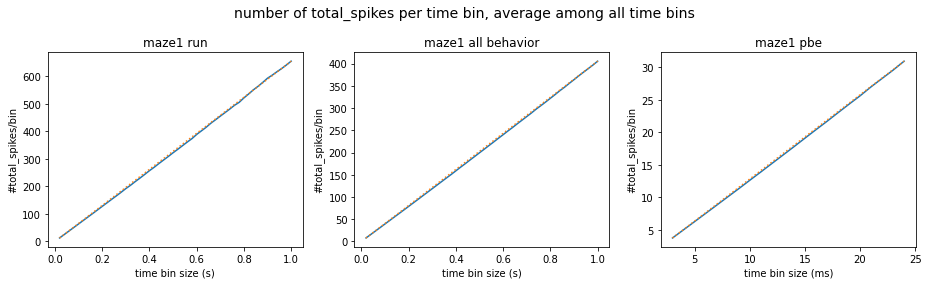

In [165]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(TB,TSL)
plt.plot(TB[[0,-1]],TSL[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#total_spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
plt.plot(TB_behav,TSL_behav)
plt.plot(TB_behav[[0,-1]],TSL_behav[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#total_spikes/bin')
plt.title('maze1 all behavior')

plt.subplot(133)
plt.plot(TB_pbe*1000,TSL_pbe)
plt.plot(TB_pbe[[0,-1]]*1000,TSL_pbe[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#total_spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('number of total_spikes per time bin, average among all time bins', fontsize=14)
plt.tight_layout()

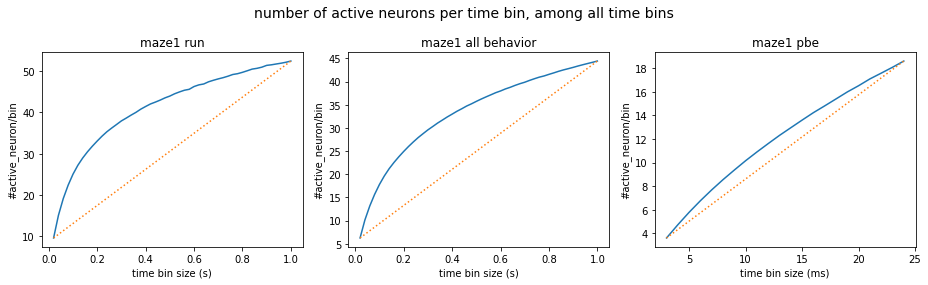

In [45]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(TB,TANL)
plt.plot(TB[[0,-1]],TANL[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 run')

plt.subplot(132)
plt.plot(TB,TANL_behav)
plt.plot(TB[[0,-1]],TANL_behav[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 all behavior')

plt.subplot(133)
plt.plot(TB_pbe*1000,TANL_pbe)
plt.plot(TB_pbe[[0,-1]]*1000,TANL_pbe[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 pbe')

fig.suptitle('number of active neurons per time bin, among all time bins', fontsize=14)
plt.tight_layout()

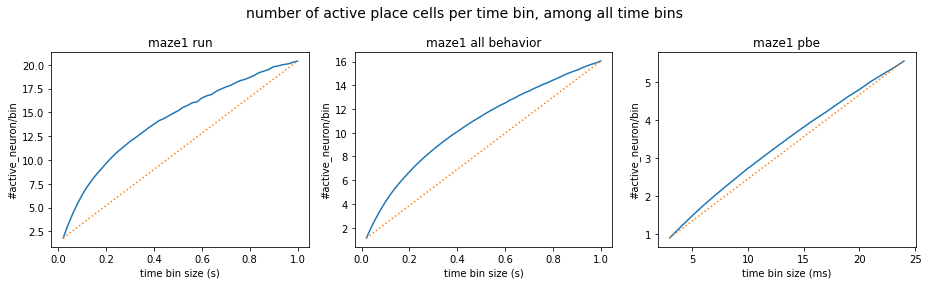

In [46]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(TB,TAPCL)
plt.plot(TB[[0,-1]],TAPCL[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 run')

plt.subplot(132)
plt.plot(TB,TAPCL_behav)
plt.plot(TB[[0,-1]],TAPCL_behav[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 all behavior')

plt.subplot(133)
plt.plot(TB_pbe*1000,TAPCL_pbe)
plt.plot(TB_pbe[[0,-1]]*1000,TAPCL_pbe[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 pbe')

fig.suptitle('number of active place cells per time bin, among all time bins', fontsize=14)
plt.tight_layout()

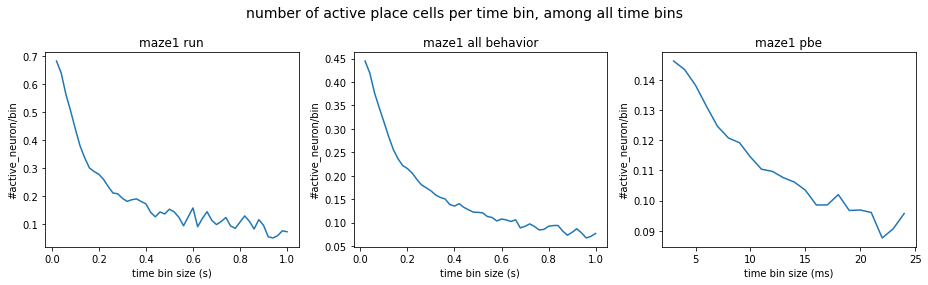

In [52]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(TB,np.gradient(TAPCL,2))
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 run')

plt.subplot(132)
plt.plot(TB,np.gradient(TAPCL_behav,2))
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 all behavior')

plt.subplot(133)
plt.plot(TB_pbe*1000,np.gradient(TAPCL_pbe,2))
plt.xlabel('time bin size (ms)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 pbe')

fig.suptitle('number of active place cells per time bin, among all time bins', fontsize=14)
plt.tight_layout()

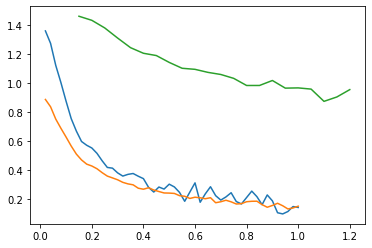

In [51]:
plt.plot(TB,np.gradient(TAPCL))
plt.plot(TB,np.gradient(TAPCL_behav))
plt.plot(TB_pbe*50,np.gradient(TAPCL_pbe)*5)

NameError: name 'meanspk_active' is not defined

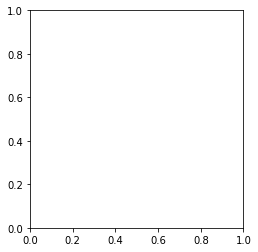

In [13]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(TB,meanspk_active)
plt.plot(TB[[0,-1]],meanspk_active[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 run')

plt.subplot(132)
plt.plot(TB_behav,meanspk_active_behav)
plt.plot(TB_behav[[0,-1]],meanspk_active_behav[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 all behav')

plt.subplot(133)
plt.plot(TB_pbe*1000,meanspk_active_pbe)
plt.plot(TB_pbe[[0,-1]]*1000,meanspk_active_pbe[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#active_neuron/bin')
plt.title('maze1 pbe')

fig.suptitle('number of spikes per active time bin', fontsize=14)
plt.tight_layout()

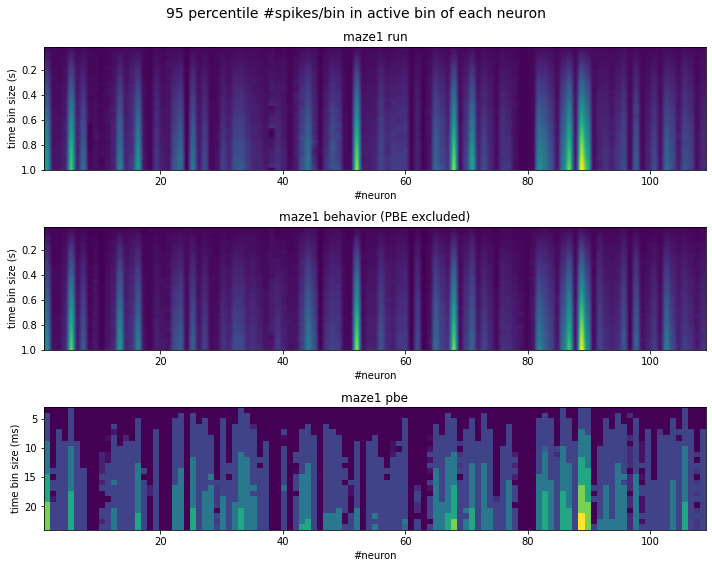

In [193]:
fig = plt.figure(figsize=(10,8))
plt.subplot(311)
plt.imshow(spikes95pct,aspect='auto',extent=[1,109,TB[-1],TB[0]])
plt.title('maze1 run')
plt.xlabel('#neuron')
plt.ylabel('time bin size (s)')

plt.subplot(312)
plt.imshow(spikes95pct_behav,aspect='auto',extent=[1,109,TB[-1],TB[0]])
plt.title('maze1 behavior (PBE excluded)')
plt.xlabel('#neuron')
plt.ylabel('time bin size (s)')

plt.subplot(313)
plt.imshow(spikes95pct_pbe,aspect='auto',extent=[1,109,TB_pbe[-1]*1000,TB_pbe[0]*1000])
plt.title('maze1 pbe')
plt.xlabel('#neuron')
plt.ylabel('time bin size (ms)')

fig.suptitle('95 percentile #spikes/bin in active bin of each neuron', fontsize=14)
plt.tight_layout()

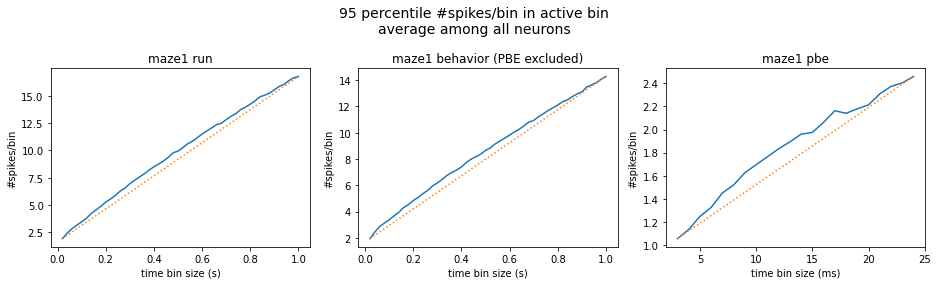

In [175]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(spikes95pct,axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]],x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(spikes95pct_behav,axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]],x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(spikes95pct_pbe,axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]] *1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\naverage among all neurons', fontsize=14)
plt.tight_layout()

In [177]:
neuron_select = (spikes95pct_behav.max(axis=0)!=spikes95pct_behav.min(axis=0))&(spikes95pct.max(axis=0)!=spikes95pct.min(axis=0))&(spikes95pct_pbe.max(axis=0)!=spikes95pct_pbe.min(axis=0))

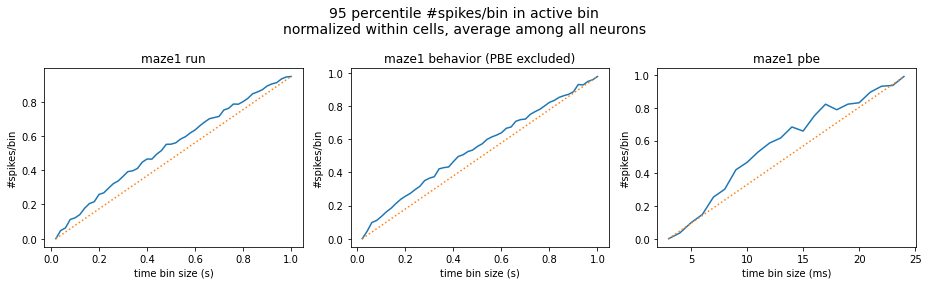

In [178]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(normalize(spikes95pct[:,neuron_select]),axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]] ,x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(normalize(spikes95pct_behav[:,neuron_select]),axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]] ,x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(normalize(spikes95pct_pbe[:,neuron_select]),axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]]*1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\nnormalized within cells, average among all neurons', fontsize=14)
plt.tight_layout()

In [14]:
def normalize(data):
    return (data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))

In [15]:
place_cell.shape

(65,)

In [16]:
zerorange = np.where(spikes95pct_pbe.max(axis=0)!=spikes95pct_pbe.min(axis=0))[0]
neuron_select = np.intersect1d(zerorange,place_cell)
neuron_select.shape

(62,)

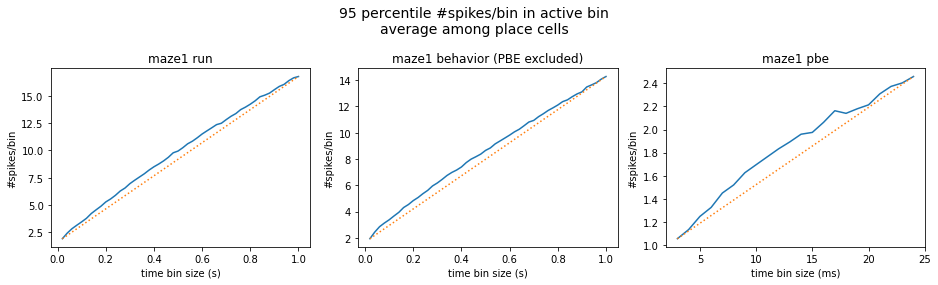

In [182]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(spikes95pct,axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]],x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(spikes95pct_behav,axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]],x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(spikes95pct_pbe,axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]] *1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\naverage among place cells', fontsize=14)
plt.tight_layout()

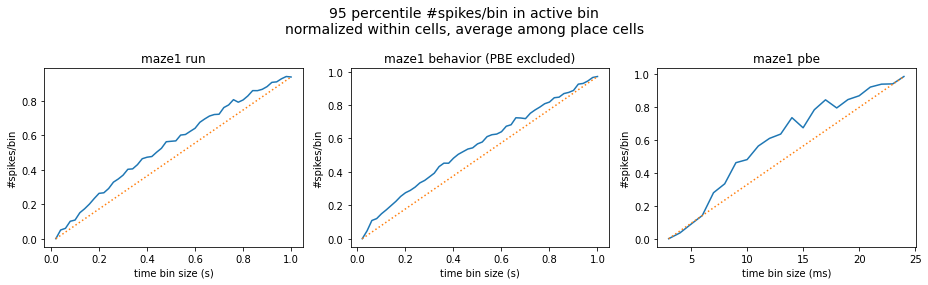

In [17]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(normalize(spikes95pct[:,neuron_select]),axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]] ,x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(normalize(spikes95pct_behav[:,neuron_select]),axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]] ,x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(normalize(spikes95pct_pbe[:,neuron_select]),axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]]*1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\nnormalized within cells, average among place cells', fontsize=14)
plt.tight_layout()

In [33]:
spikes95pct.shape

(50, 109)

<ipython-input-14-9f88d94339bc>:2: RuntimeWarning: invalid value encountered in true_divide
<ipython-input-14-9f88d94339bc>:2: RuntimeWarning: invalid value encountered in true_divide
No handles with labels found to put in legend.


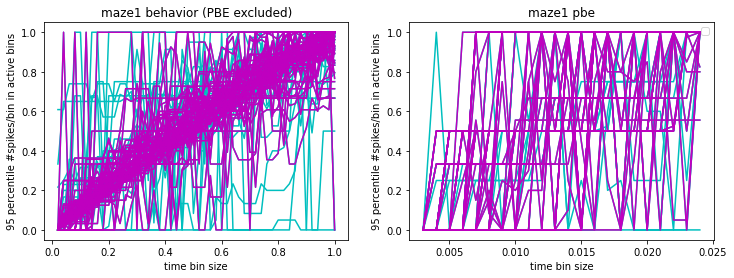

In [18]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
nsr = normalize(spikes95pct)
# nsr = nsr[:,neuron_select]
plt.plot(TB,nsr,'c')
plt.plot(TB,nsr[:,neuron_select],'m')
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(122)
nsr_pbe = normalize(spikes95pct_pbe)
plt.plot(TB_pbe,nsr_pbe,'c')
plt.plot(TB_pbe,nsr_pbe[:,neuron_select],'m')
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 pbe')
plt.legend()

Text(0.5, 1.0, 'maze1 pbe')

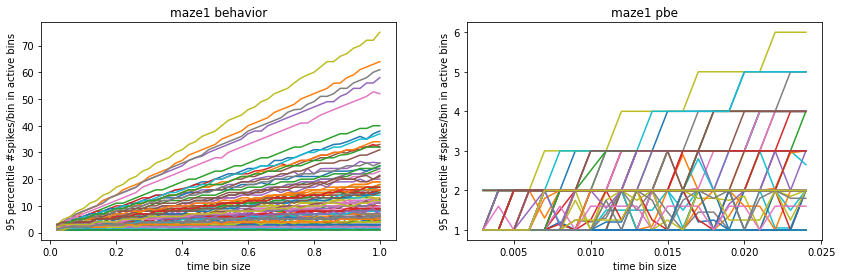

In [85]:
fig = plt.figure(figsize=(14,4))

plt.subplot(121)
plt.plot(TB,spikes95pct)
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 behavior (PBE excluded)')
# plt.ylim([0,5])

plt.subplot(122)
plt.plot(TB_pbe,spikes95pct_pbe)
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 pbe')

In [56]:
np.unique(np.diff(spikes95pct[:,4]))[0]>=0

True

In [42]:
spikes95pct.shape

(50, 109)

In [188]:
# np.unique((spikes95pct_pbe.max(axis=0)-spikes95pct_pbe.min(axis=0)))
neuron_select = (spikes95pct_behav[-1,:]>5) & (spikes95pct_behav[-1,:]<40) & ((spikes95pct_pbe.max(axis=0)-spikes95pct_pbe.min(axis=0))>0) 

Text(0.5, 1.0, 'maze1 pbe')

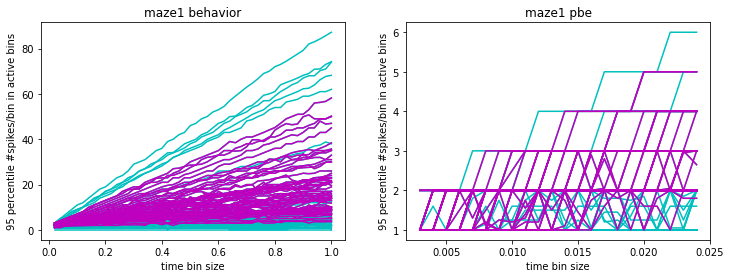

In [189]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
x1 = spikes95pct #normalize(spikes95pct)
plt.plot(TB,x1,'c')
plt.plot(TB,x1[:,neuron_select],'m')
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 behavior')

plt.subplot(122)
x2 = spikes95pct_pbe #normalize(spikes95pct_pbe)
plt.plot(TB_pbe,x2,'c')
plt.plot(TB_pbe,x2[:,neuron_select],'m')
plt.xlabel('time bin size')
plt.ylabel('95 percentile #spikes/bin in active bins')
plt.title('maze1 pbe')

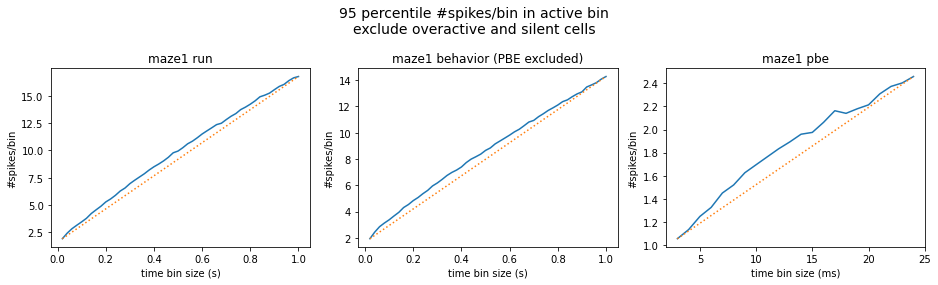

In [190]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(spikes95pct,axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]],x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(spikes95pct_behav,axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]],x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(spikes95pct_pbe,axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]] *1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\nexclude overactive and silent cells', fontsize=14)
plt.tight_layout()

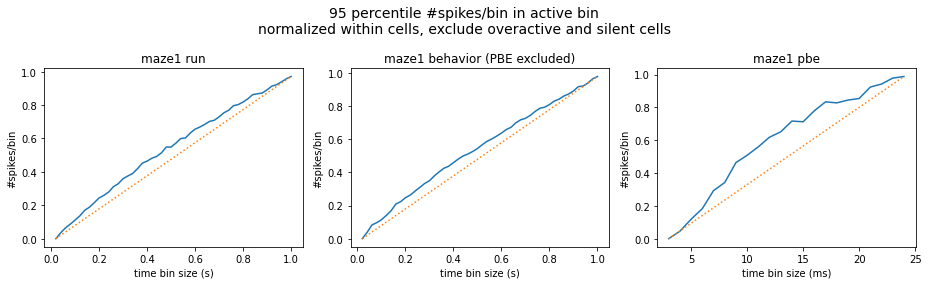

In [191]:
fig = plt.figure(figsize=(13,4))

plt.subplot(131)
x1 = np.mean(normalize(spikes95pct[:,neuron_select]),axis=1)
plt.plot(TB,x1)
plt.plot(TB[[0,-1]] ,x1[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 run')

plt.subplot(132)
x2 = np.mean(normalize(spikes95pct_behav[:,neuron_select]),axis=1)
plt.plot(TB,x2)
plt.plot(TB[[0,-1]] ,x2[[0,-1]],':')
plt.xlabel('time bin size (s)')
plt.ylabel('#spikes/bin')
plt.title('maze1 behavior (PBE excluded)')

plt.subplot(133)
x3 = np.mean(normalize(spikes95pct_pbe[:,neuron_select]),axis=1)
plt.plot(TB_pbe*1000,x3)
plt.plot(TB_pbe[[0,-1]]*1000,x3[[0,-1]],':')
plt.xlabel('time bin size (ms)')
plt.ylabel('#spikes/bin')
plt.title('maze1 pbe')

fig.suptitle('95 percentile #spikes/bin in active bin\nnormalized within cells, exclude overactive and silent cells', fontsize=14)
plt.tight_layout()

In [108]:
np.savez('totalspikes_vs_timebin_maze1pbe',TB,TSL,TANL)

# histogram of spike intervals

In [25]:
n_neuron = st.data.shape[0]
n_neuron

109

(array([14.,  7.,  7.,  1.,  3.,  1.,  2.,  0.,  0.,  6.]),
 array([0.00146667, 0.01106333, 0.02066   , 0.03025667, 0.03985333,
        0.04945   , 0.05904667, 0.06864333, 0.07824   , 0.08783667,
        0.09743333]),
 <BarContainer object of 10 artists>)

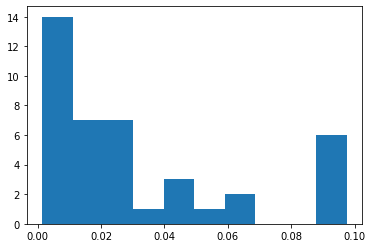

In [14]:
plt.hist(np.diff(st[0].data[0]))

In [26]:
spike_interval = [np.array([])]*n_neuron
len(spike_interval)

109

In [27]:
spike_interval = [np.array([])]*n_neuron
for st_epoch in st:
    for i in range(n_neuron):
        spike_interval[i] = np.append(spike_interval[i],np.diff(st_epoch.data[i]))

In [34]:
spike_interval_pbe = [np.array([])]*n_neuron
for pbe_epoch in pbe:
    for i in range(n_neuron):
        spike_interval_pbe[i] = np.append(spike_interval_pbe[i],np.diff(pbe_epoch.data[i]))

In [167]:
np.savez('spike_intervals_in_s',spike_interval=spike_interval, spike_interval_pbe=spike_interval_pbe,dtype=object)

/home/kemerelab/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [170]:
spike_interval=np.load('spike_intervals_in_s.npz',allow_pickle=True)['spike_interval']

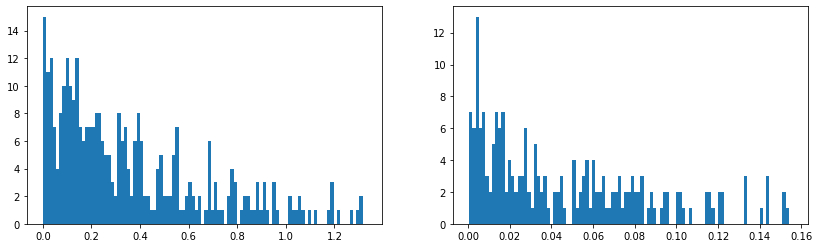

In [120]:
i = 16
fig = plt.figure(figsize=(14,4))

plt.subplot(121)
x = spike_interval[i]
# plt.hist(x,bins=100,range=(0,0.1))
plt.hist(x,bins=100,range=(x.min(),np.percentile(x,95)))

plt.subplot(122)
x = spike_interval_pbe[i]
# plt.hist(x,bins=100,range=(0,0.1))
plt.hist(x,bins=100,range=(x.min(),np.percentile(x,95)))

plt.show()

In [121]:
spike_interval[i].shape, spike_interval_pbe[i].shape

((350,), (212,))

In [158]:
x = np.concatenate(spike_interval)
hist_all, bin_edges = np.histogram(x,bins=100,range=(x.min(),np.percentile(x,95)))

hists_cell = []
for i in range(n_neuron):
    x = spike_interval[i]
    hist, _ = np.histogram(x,bins=bin_edges)
    hists_cell.append(hist)
hists_cell = np.array(hists_cell)
total_spikes_cell = hists_cell.sum(axis=1)
hists_cell_n = hists_cell.copy()/total_spikes_cell[:,np.newaxis]

<ipython-input-158-7fbf335ce9bf>:11: RuntimeWarning: invalid value encountered in true_divide


(1, 1)

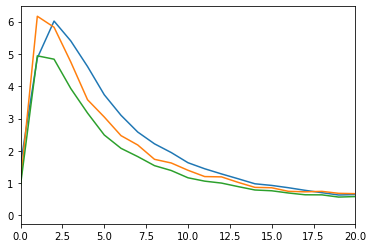

In [159]:
plt.plot(hist_all/14000*6)
plt.plot(hists_cell_n[total_spikes_cell>100,:].sum(axis=0))
plt.plot(hists_cell_n[total_spikes_cell>200,:].sum(axis=0))
plt.xlim([0,20])

np.argmax(hists_cell_n[total_spikes_cell>100,:].sum(axis=0)),np.argmax(hists_cell_n[total_spikes_cell>200,:].sum(axis=0))

In [160]:
bin_edges[1:3].mean()

0.0037621499999986496

In [163]:
x = np.concatenate(spike_interval_pbe)
hist_all, _ = np.histogram(x,bins=bin_edges)

hists_cell = []
for i in range(n_neuron):
    x = spike_interval[i]
    hist, _ = np.histogram(x,bins=bin_edges)
    hists_cell.append(hist)
hists_cell = np.array(hists_cell)
total_spikes_cell = hists_cell.sum(axis=1)
hists_cell_n = hists_cell.copy()/total_spikes_cell[:,np.newaxis]

<ipython-input-163-604d6a1766a1>:11: RuntimeWarning: invalid value encountered in true_divide


(1, 1)

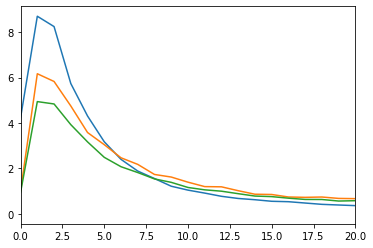

In [164]:
plt.plot(hist_all/14000*6)
plt.plot(hists_cell_n[total_spikes_cell>100,:].sum(axis=0))
plt.plot(hists_cell_n[total_spikes_cell>200,:].sum(axis=0))
plt.xlim([0,20])

np.argmax(hists_cell_n[total_spikes_cell>100,:].sum(axis=0)),np.argmax(hists_cell_n[total_spikes_cell>200,:].sum(axis=0))

In [157]:
np.where(total_spikes_cell>100)[0].shape

(60,)

In [153]:
bin_edges[5:7].mean()

0.004066333333386411

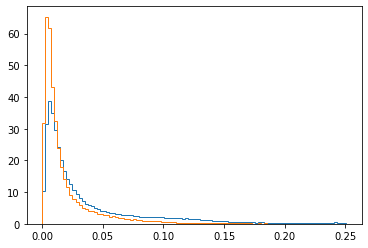

In [100]:
x = np.concatenate(spike_interval)
_, bins, _ = plt.hist(x,bins=100,range=(x.min(),np.percentile(x,95)),histtype='step',density=True)

x_pbe = np.concatenate(spike_interval_pbe)
plt.hist(x_pbe,bins=bins,histtype='step',density=True)

plt.show()

In [101]:
np.percentile(x,95)

0.25080999999991

In [103]:
x.shape[0]

151935

In [106]:
np.where(x<0.1)[0].shape[0]/x.shape[0]

0.8417020436370817

In [108]:
np.percentile(x_pbe,84)

0.034299999999348074

In [109]:
np.percentile(x,84)/np.percentile(x_pbe,84)

2.889212828080332

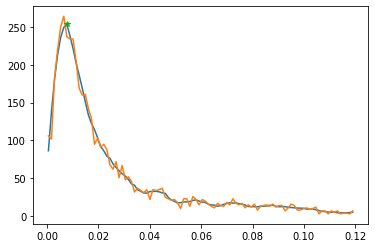

In [47]:
hist_sm = savgol_filter(hist, 11, 2)
m_idx = hist_sm.argmax()
plt.plot(bin_edges[:-1],hist_sm)
plt.plot(bin_edges[:-1],hist)
plt.plot(bin_edges[m_idx],hist_sm[m_idx],'*')

In [66]:
x = spike_interval_pbe[2]
hist, bin_edges = np.histogram(x,bins=100,range=(x.min(),np.percentile(x,95)))
hist_sm = savgol_filter(hist, 11, 2)
m_idx = hist_sm.argmax()
np.mean(bin_edges[m_idx:m_idx+2])

0.004164458332004416

In [67]:
x = spike_interval[2]
hist, bin_edges = np.histogram(x,bins=100,range=(x.min(),np.percentile(x,95)))
hist_sm = savgol_filter(hist, 11, 2)
m_idx = hist_sm.argmax()
np.mean(bin_edges[m_idx:m_idx+2])

0.0074866416679037675